In [1]:

# multivariate output multi-step 1d cnn example
import numpy as np
from numpy import array
import pandas as pd
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import Input, TimeDistributed, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape,GRU, LeakyReLU, Reshape,Permute,ConvLSTM2D,ConvLSTM1D,Conv1D	,UpSampling2D,Conv2DTranspose,ZeroPadding2D,UpSampling1D,Cropping1D,Lambda,LSTM,RepeatVector
from keras.models import Model
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data.xlsx', sheet_name="Second", index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,,,,,,,,,,,,,,,,,,,,,
2011,685,82092.69810,27420.5750,3307.8302,18.0,22.4,27.3,31.1,32.8,30.9,...,29.3,27.0,21.4,78.3,105.6,49.4,0.0,0.0,4.1,5.8
2012,729,103927.08685,31394.7680,3373.0787,19.0,23.0,27.7,30.9,32.6,30.8,...,29.8,27.6,22.5,21.4,79.9,17.1,14.0,0.1,0.0,63.4
2013,785,99677.19450,37919.8715,3513.0847,19.4,24.5,29.9,33.9,34.1,29.6,...,29.2,25.9,19.9,54.0,61.5,0.9,0.0,19.8,31.9,40.1
2014,780,94715.40840,28671.8170,4232.6770,22.4,26.8,30.9,34.8,36.0,31.2,...,29.3,26.3,21.3,22.1,34.9,89.8,3.5,0.2,95.4,54.9
2015,857,88612.86270,27352.5125,3949.8155,17.9,24.3,28.0,34.2,35.0,30.9,...,30.0,28.4,23.5,21.5,65.7,4.8,0.4,10.9,130.0,32.1


In [3]:
from sklearn.preprocessing import MinMaxScaler

def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [4]:
for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_8184\2452207798.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [5]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,,,,,,,,,,,,,,,,,,,,,
2011,0.000000,0.000000,0.004772,0.016193,0.022222,0.000000,0.000000,0.035714,0.058824,0.487179,...,0.071429,0.314286,0.288462,1.000000,1.000000,0.548098,0.000000,0.000000,0.031538,0.078697
2012,0.127168,0.449820,0.283388,0.031602,0.244444,0.111111,0.086957,0.000000,0.000000,0.461538,...,0.428571,0.485714,0.500000,0.234186,0.750485,0.186801,0.453074,0.005051,0.000000,0.860244
2013,0.289017,0.362266,0.740840,0.064664,0.333333,0.388889,0.565217,0.535714,0.441176,0.153846,...,0.000000,0.000000,0.000000,0.672948,0.571845,0.005593,0.000000,1.000000,0.245385,0.544098
2014,0.274566,0.260046,0.092492,0.234596,1.000000,0.814815,0.782609,0.696429,1.000000,0.564103,...,0.071429,0.114286,0.269231,0.243607,0.313592,1.000000,0.113269,0.010101,0.733846,0.744912
2015,0.497110,0.134325,0.000000,0.167798,0.000000,0.351852,0.152174,0.589286,0.705882,0.487179,...,0.571429,0.714286,0.692308,0.235532,0.612621,0.049217,0.012945,0.550505,1.000000,0.435550


In [6]:
train = data[:9]
test = data[9:]

In [7]:
y_train = train['Yield'].to_numpy()
X_train = train.drop(columns=['Yield']).to_numpy()

y_test = test['Yield'].to_numpy()
X_test = test.drop(columns=['Yield']).to_numpy()

In [8]:
X_train.shape

(9, 38)

In [9]:
X_test.shape

(3, 38)

In [10]:
X_train = X_train.reshape((9, 1, 38))
X_test = X_test.reshape((3,1,38))

In [11]:
X_train.shape

(9, 1, 38)

In [12]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, 38)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1000, verbose=0)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             2496      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,797
Trainable params: 5,797
Non-trainable params: 0
______________________________________________________

In [14]:
# demonstrate prediction
# Xtest = Xtest.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[0.48079807]
 [0.90103424]
 [0.47504044]]


In [15]:

# Ytest = Ytest.reshape(179,40)
# Ytest = Ytest.reshape(179,20)


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test,yhat)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.43619046792359256
MSE:  0.2310005996960295
RMSE 0.4806252174990712


In [17]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print(rmse(y_test, yhat))

0.3989194862551975


LSTM but data might require preprocessing

In [18]:
...
# design network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dense(1))
model2.compile(loss='mae', optimizer='adam')
# fit network
history = model2.fit(X_train, y_train, epochs=1000, verbose=2, shuffle=False);
# plot history


Epoch 1/1000
1/1 - 2s - loss: 0.4895 - 2s/epoch - 2s/step
Epoch 2/1000
1/1 - 0s - loss: 0.4468 - 0s/epoch - 0s/step
Epoch 3/1000
1/1 - 0s - loss: 0.4082 - 16ms/epoch - 16ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.3697 - 0s/epoch - 0s/step
Epoch 5/1000
1/1 - 0s - loss: 0.3337 - 6ms/epoch - 6ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.3090 - 7ms/epoch - 7ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.2915 - 16ms/epoch - 16ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.2742 - 0s/epoch - 0s/step
Epoch 9/1000
1/1 - 0s - loss: 0.2594 - 0s/epoch - 0s/step
Epoch 10/1000
1/1 - 0s - loss: 0.2497 - 16ms/epoch - 16ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.2401 - 0s/epoch - 0s/step
Epoch 12/1000
1/1 - 0s - loss: 0.2304 - 0s/epoch - 0s/step
Epoch 13/1000
1/1 - 0s - loss: 0.2242 - 16ms/epoch - 16ms/step
Epoch 14/1000
1/1 - 0s - loss: 0.2202 - 0s/epoch - 0s/step
Epoch 15/1000
1/1 - 0s - loss: 0.2155 - 16ms/epoch - 16ms/step
Epoch 16/1000
1/1 - 0s - loss: 0.2103 - 0s/epoch - 0s/step
Epoch 17/1000
1/1 - 0s - loss: 0.2046 - 0

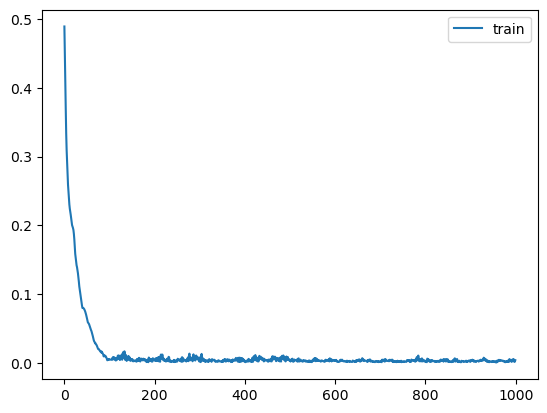

In [19]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [20]:
# make a prediction
yhatlstm = model2.predict(X_test)


1/1 [==============================] - 0s 484ms/step


In [21]:
yhatlstm.shape

(3, 1)

In [22]:
mae = mean_absolute_error(y_test,yhatlstm)
mse = mean_squared_error(y_test, yhatlstm)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.5063233592606694
MSE:  0.3379491185731424
RMSE 0.5813339131455711


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


In [24]:
mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)

In [25]:
nsamples, nx, ny = X_train.shape
Xt = X_train.reshape((nsamples,nx*ny))
Xt.shape

(9, 38)

In [26]:
nsamples, nx, ny = X_test.shape
Xtst = X_test.reshape((nsamples,nx*ny))
Xtst.shape

(3, 38)

In [27]:
mdl.fit(Xt, y_train)

RandomForestRegressor(n_jobs=6, random_state=0)

In [28]:
y_pred = mdl.predict(Xtst)

In [29]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.40820809248554896
MSE:  0.16676635091939798
RMSE 0.4083703599912682
